## Plot network localization for an event

In [1]:
import numpy as np
import pylab as plt

from pycbc import psd, detector
from pycbc.cosmology import redshift
from simple_pe.localization import Event

import configurations

In [2]:
savefig=True

Network details

In [3]:
net_thresh = 8
found_thresh = 4
loc_thresh = 3

In [4]:
networks = configurations.generate_networks(net_thresh, found_thresh, loc_thresh)

In [5]:
method = "coh"

In [6]:
psi = 0.
cosi = 1.
gps = float(999995380)

In [7]:
dl = 2900.
z = redshift(dl)
mass = 1.4
m1 = m2 = mass * (1 + z)

In [8]:
ra = -90.
dec = 30.

In [9]:
params = {}
params['distance'] = dl
params['gps'] = gps
params['coa-phase'] = 0.
params['polarization'] = psi
params['inclination'] = np.arccos(cosi)
params['mass1'] = m1
params['mass2'] = m2
params['RAdeg'] = ra
params['DEdeg'] = dec

In [10]:
bns_event = {}
for name, net in networks.items():
    
    bns_event[name] = Event.from_params(params=params)
    bns_event[name].add_network(net)
    if bns_event[name].detected:
        if bns_event[name].localized >= 3:
            bns_event[name].localize_all() 

/mnt/c/Users/spxsf2/Code/simple-pe/simple_pe/localization/loc.py:194: RuntimeWarning: divide by zero encountered in double_scalars
  self.like += np.log(32. * (self.D / d_max) ** 3 * self.D ** 4 / (Fp ** 2 * Fc ** 2)
/mnt/c/Users/spxsf2/Code/simple-pe/simple_pe/localization/loc.py:17: RuntimeWarning: invalid value encountered in sqrt
  sigma = 1 / np.sqrt(ev + epsilon)


In [11]:
ra_min = 266
ra_max = 274
dec_min = 27
dec_max = 35
step = 1

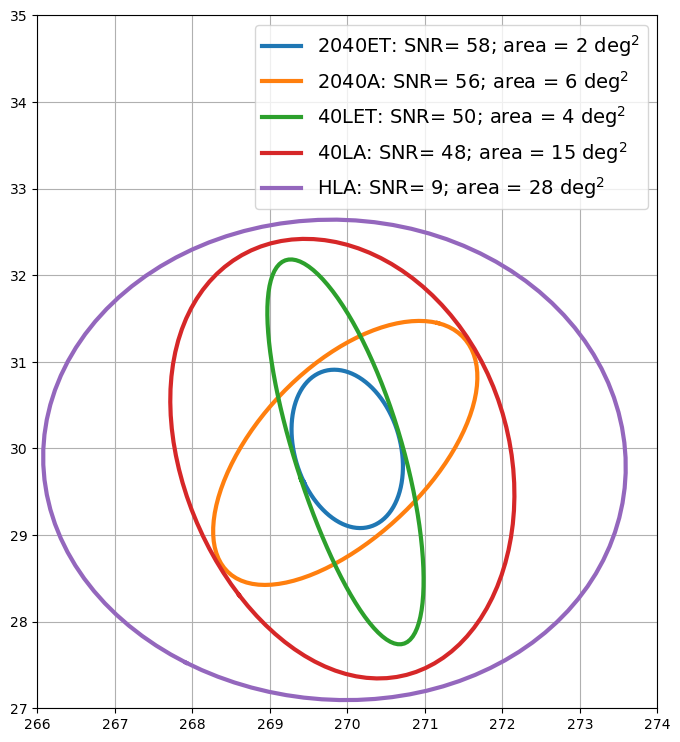

In [12]:
plt.figure(figsize=[8,9])
for name, net in reversed(networks.items()):

    ev = bns_event[name]

    if ev.detected and ev.localized >=3:
        phi, theta = ev.localization['coh'].make_ellipse()
        plt.plot(np.degrees((phi - np.pi) % (2 * np.pi) + np.pi), np.degrees(theta),
             label=(r'%s: SNR= %.0f; area = %.0f $\mathrm{deg}^2$' % (name, np.sqrt(ev.snrsq), 
                                                                      ev.localization['coh'].area)),
             linewidth=3)
        
plt.legend(loc='upper right', fontsize=14)

ax = plt.gca()

plt.xticks(np.arange(ra_min, ra_max + step , step))
plt.yticks(np.arange(dec_min, dec_max + step, step))

plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)

plt.grid()
if savefig:
    plt.savefig('Localization_ellipse_z_%s.png' % str(round(z,1)).replace('.', '_'), 
                transparent=True, bbox_inches='tight')

In [13]:
dl = 7000.
z = redshift(dl)
mass = 1.4
m1 = m2 = mass * (1 + z)

In [14]:
ra = -90.
dec = 30.

In [15]:
params = {}
params['distance'] = dl
params['gps'] = gps
params['coa-phase'] = 0.
params['polarization'] = psi
params['inclination'] = np.arccos(cosi)
params['mass1'] = m1
params['mass2'] = m2
params['RAdeg'] = ra
params['DEdeg'] = dec

In [16]:
bns_event = {}
for name, net in networks.items():
    
    bns_event[name] = Event.from_params(params=params)
    bns_event[name].add_network(net)
    if bns_event[name].detected:
        if bns_event[name].localized >= 3:
            bns_event[name].localize_all() 

In [17]:
ra_min = 266
ra_max = 274
dec_min = 25
dec_max = 35
step = 1

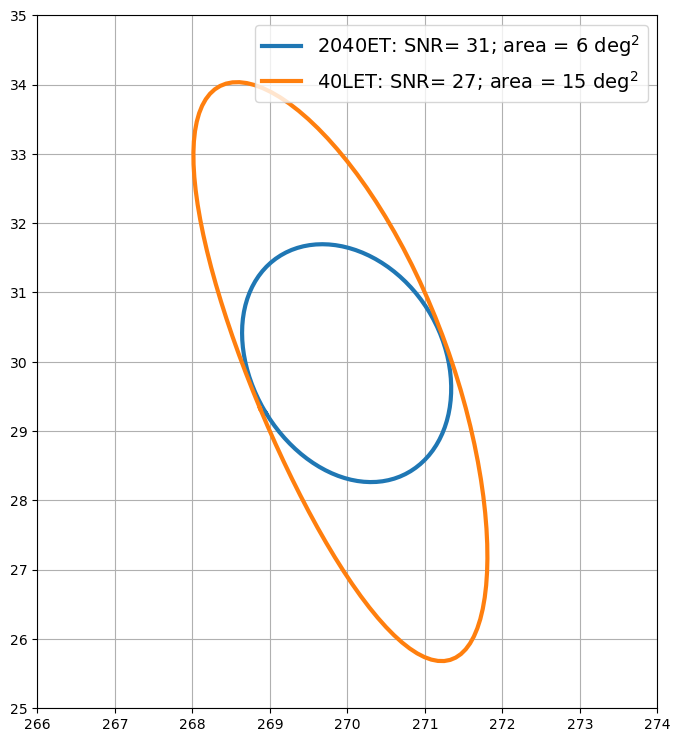

In [18]:
plt.figure(figsize=[8,9])
for name, net in reversed(networks.items()):

    ev = bns_event[name]

    if ev.detected and ev.localized >=3:
        phi, theta = ev.localization['coh'].make_ellipse()
        plt.plot(np.degrees((phi - np.pi) % (2 * np.pi) + np.pi), np.degrees(theta),
             label=(r'%s: SNR= %.0f; area = %.0f $\mathrm{deg}^2$' % (name, np.sqrt(ev.snrsq), 
                                                                      ev.localization['coh'].area)),
             linewidth=3)
        
plt.legend(loc='upper right', fontsize=14)

ax = plt.gca()

plt.xticks(np.arange(ra_min, ra_max + step , step))
plt.yticks(np.arange(dec_min, dec_max + step, step))

plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)

plt.grid()
if savefig:
    plt.savefig('Localization_ellipse_z_%s.png' % 
                str(round(z,1)).replace('.', '_'), transparent=True, bbox_inches='tight')